<a href="https://colab.research.google.com/github/Stud-proekt/GIS-Colab/blob/main/kmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.6TSDOO_3.0.1/kmnist-train.tfrecord*...:   0%|          |…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.6TSDOO_3.0.1/kmnist-test.tfrecord*...:   0%|          | …

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


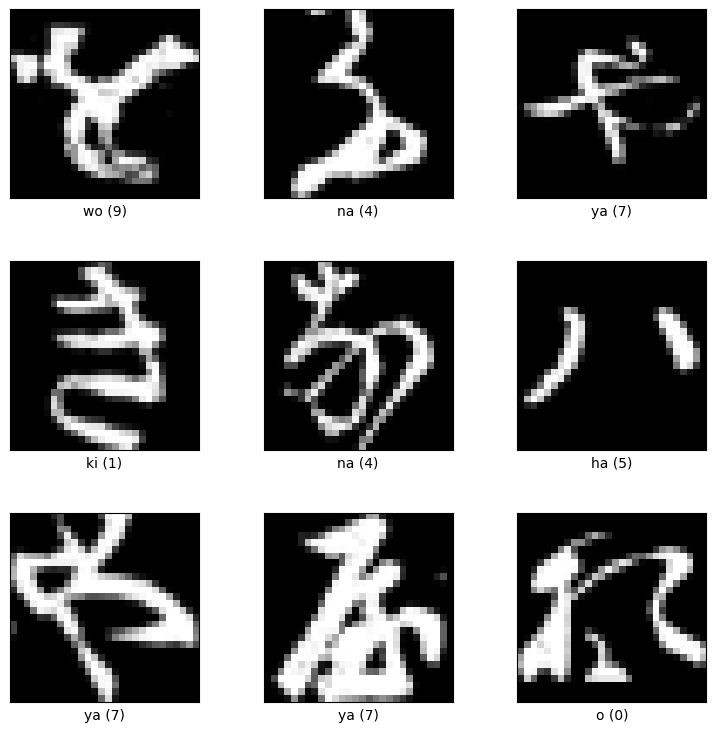

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 70ms/step - accuracy: 0.8321 - loss: 0.5331 - val_accuracy: 0.9057 - val_loss: 0.3121
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9719 - loss: 0.0973 - val_accuracy: 0.9246 - val_loss: 0.2754
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9851 - loss: 0.0516 - val_accuracy: 0.9421 - val_loss: 0.2217
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9923 - loss: 0.0263 - val_accuracy: 0.9397 - val_loss: 0.2460
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9958 - loss: 0.0145 - val_accuracy: 0.9359 - val_loss: 0.2605
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.9374 - val_loss: 0.2796
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9431 - val_loss: 0.2755
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9975 - loss: 0.0081 - 

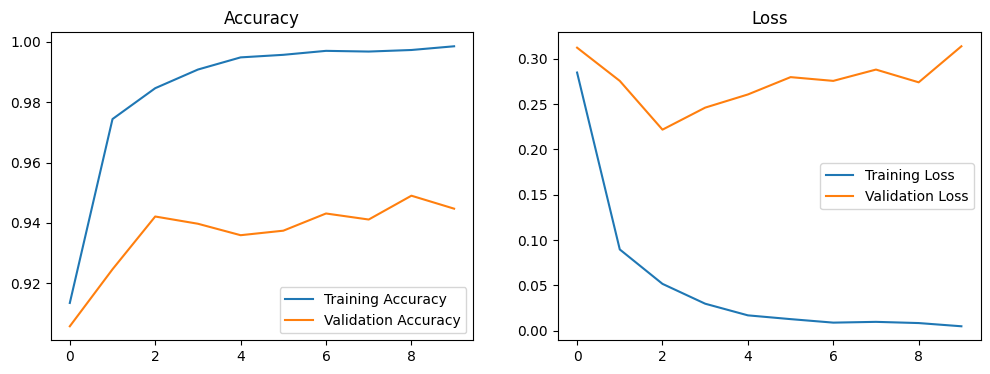

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


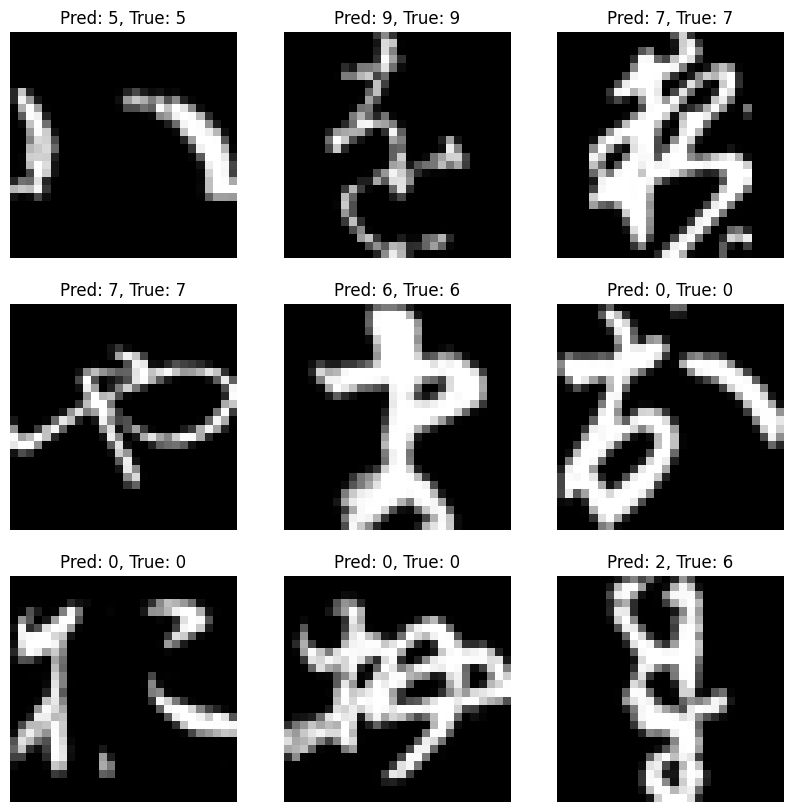

In [ ]:
# Импорт необходимых библиотек
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Загрузка датасета KMNIST
(ds_train, ds_test), ds_info = tfds.load(
    'kmnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Предобработка данных: нормализация и батчинг
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128).cache().prefetch(tf.data.AUTOTUNE)

# Визуализация примеров изображений
fig = tfds.show_examples(ds_train.unbatch().take(9), ds_info)

# Создание модели CNN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(ds_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Графики обучения
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Предсказания на тестовых данных
sample_images = []
sample_labels = []
for images, labels in ds_test.take(1):
    sample_images = images[:9]
    sample_labels = labels[:9]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Визуализация предсказаний
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].numpy().squeeze(), cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}, True: {sample_labels[i].numpy()}')
    plt.axis('off')
plt.show()